Caelan osman

Homework 10.1

January 13, 2021

# Exercise 10.1
We use importance sampling, to draw from $\operatorname{Beta}(a, b)$ for various values of $a$ and $b$, to estimate the integral

\begin{align}
\int_0^{\pi} \frac{dx}{x^3 + 2x + 3}
\end{align}

We find values of $a, b$ and sample size $n$ that give a standard error of less than $10^{-3}$

Note that the beta pdf is only valid on $[0, 1]$, so what we will do is transform our integral to this domain using the
change of coordinates function $y(x) = x\pi$.
Then notice that

\begin{align}
\int_0^\pi h(x) &= \int_0^1 h(y(x))y'(x)dx \approx \frac{1}{n} \sum_{i=1}^n  \frac{h(y(x))y'(x)}{f_X(x)}
\end{align}

As we can see below we found that $\operatorname{Beta}(1, 1)$ with $n=10^6$ was a good choice for the distribution and sample size.

In [2]:
import numpy as np
from scipy.stats import beta
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [2]:
def problem10_1(a, b, n=int(1e6)):
    #define function to integrate
    h = lambda x: 1/(x**3 + 2*x +3)
    #define change of variables function and it's derivatives
    cov = lambda x: x *np.pi
    D = lambda x: x**0 * np.pi

    #new integrand
    transformed = lambda x: h(cov(x)) *D(x)

    #get beta draw on [0, pi]
    sample = np.random.beta(a, b, size=n)

    #values to plug into our estimator
    values = transformed(sample) / beta.pdf(sample, a, b)
    #get the estimate
    estimate = np.sum(values) / n
    #now we calculate the standard error
    variance = sum((values - estimate)**2) / (n-1)
    std_err = np.sqrt(variance / n)

    return estimate, std_err

estimate, std_error  = problem10_1(1, 1)
print('estimate: ', estimate)
print('standard error: ', std_error)
print('Standard Error Less than 10^(-3):', std_error < 1e-3)

estimate:  0.40266361934769934
standard error:  0.00028425508776082353
Standard Error Less than 10^(-3): True


# Exercise 10.2
We finish proving the universality of the uniform.

Since $F^{-1}$ is continuous, the function $X = F^{-1}(U)$ is a random variable. Since $P(U \leq u) = u$ for any $u\in (0, 1)$, the c.d.f. of $X$ is

\begin{align}
        P(X \leq x) &= P(F^{-1}(U) \leq x) = P(U\leq F(x)) \\
        &=
        \begin{cases}
            0 & \text{ if } F(x) \leq 0, \\
            F(x) &\text{ if } F(x) \in (0, 1), \\
            1 & \text{ if } F(x) \geq 1
        \end{cases}
\end{align}

Furthermore, if $F$ is conitnuous, then $Y = F(X)$ is also a random variable. It's c.d.f. is
\begin{align}
P(Y \leq y) = P(F(X) \leq y) = P(X \leq F^{-1}(y)) = F(F^{-1}(y)) = y
\end{align}

Therefore, $Y\sim \operatorname{Uniform}(0, 1)$.

# Exercise 10.3

Let $X$ be a discrete random variable with c.d.f. $F_x(x)$, because this c.d.f. is usually not invertible $F^{-1}(U)$ cannot be used for inversion sampling.
But if we let $X$ be supported on a discrete set $A\subset \mathbb{R}$ then we can define $G(u) = \inf \{a\in A | u \leq F_X(a)\}$.

## Part 1:

Let $U\sim \operatorname{Uniform}(0, 1)$,  we show that $Y \sim G(U)$ is a random variable.
Recall that the definition of a random variable requires that $Y$ is a function on a probability space.
That is every $y$ in the domain of $Y$ is mapped to something.
From the definition of $G$ we can see that this is clear.
$Y$ is a function on a proability space, thus a random variable.

Furthermore, we suppose that $\operatorname{supp}(X) = A$ we show that $Y$ has a c.d.f. equal to $F_X$.
Because $X$ is a discrete random variable we can write its c.d.f. as

\begin{align}
F_X(y) &= \sum_{a\in A} P(a) \mathbb{1}_{a < y}
\end{align}

now we want to think about the c.d.f. of our random variable $Y$.

\begin{align}
P(Y \leq y) &= P(G(Y) \leq y) = P(\inf\{a\in A | y \leq F_x(a)\} \leq y)
\end{align}

However, notice that as it is written, our c.d.f. is discrete because $G$ itself is discrete.
This means

\begin{align}
P(Y\leq y) &= \sum_{a\in A} P(a) Y = \sum_{a\in A} P(a) G(y) = \sum_{a\in A} P(a) \inf\{a\in A | y \leq  F_x(a)\}\, dy\\
&= \sum_{a\in A} P(a) \mathbb{1}_{a < y}
\end{align}

Therefore the c.d.f. of $Y$ is the same as the c.d.f. of $X$.

## Part 2:

In the case that our discrete random variable is Bernoulli our discrete set is $\{0, 1\}$
which determines our function $G$.

In [4]:
def G(u, A, RV, *args, nbinom=False):
    '''
    this is our discrete function defined in the book.
    '''
    if not nbinom:
        G_u = np.array([a if u <= RV.cdf(a, *args) else np.inf for a in A ])
    else:
        G_u = np.array([a if u <= RV.cdf(*args[0], a *args[-1]) else np.inf for a in A ])

    return A[np.argmin(G_u)]

def draw_bernoulli_inv(n, p):
    '''
    Discrete inversion sampling of bernoulli distribution
    '''
    #define our discrete set
    A = [0, 1]
    #get our uniform draw
    U = np.random.uniform(low=0, high=1, size=n)
    bernoulli_draw = np.zeros_like(U)

    for i, u in enumerate(U):
        bernoulli_draw[i] = G(u, A, bernoulli,  p )

    return bernoulli_draw

#now we draw 1000 times with p=0.5
bernoulli_inv = draw_bernoulli_inv(1000, 0.5)
print(bernoulli_inv)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.

## Part 3

time of drawing from binomial using inversion sampling:
1.16 s ± 129 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

time of drawing from binomial using inversion sampling of bernoulli
1.37 s ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


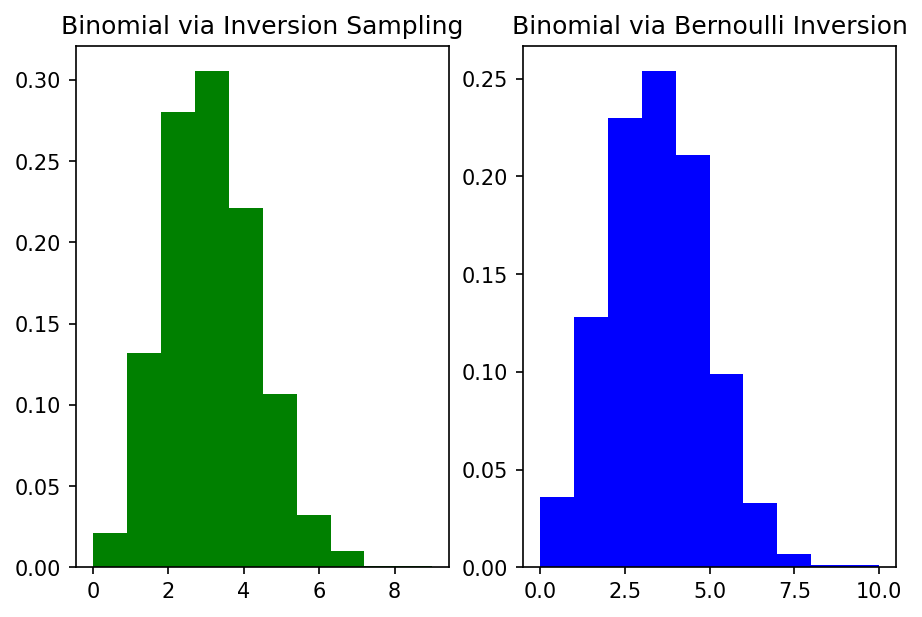

In [12]:
def draw_binomial_inv(n, p, N=10):
    '''
    draws from a binomial distribution using inversion sampling
    '''

    #define our discrete set
    A = np.arange(0, N+1).astype(int)
    #draw from the univorm n times
    U = np.random.uniform(low=0, high=1, size=n)
    #intialize our binomial draw
    binomial_draw = np.zeros_like(U)
    #now draw from binomial using descrete inversion sampling
    for i, u in enumerate(U):
        binomial_draw[i] = G(u, A, binom, N, p)

    return binomial_draw

def draw_binomial_bern(n, p, N=10):
    '''
    draws from a binomial distribution by summing the draw from a bernoulli inversion sample
    '''
    #initialize binomial draw
    binomial_draw = np.zeros(n)
    for i in range(n):
        #get binomial draw by summing a bernoulli inversion sampling draw
        binomial_draw[i] = np.sum(draw_bernoulli_inv(N, p))

    return binomial_draw


print('time of drawing from binomial using inversion sampling:')
%timeit draw_binomial_inv(1000, 0.3)
inv_binom = draw_binomial_inv(1000, 0.3)
print()
print('time of drawing from binomial using inversion sampling of bernoulli')
%timeit draw_binomial_bern(1000, 0.3)
inv_binom_bern = draw_binomial_bern(1000, 0.3)

fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.set_dpi(150)
ax = axs[0]
ax.hist(inv_binom, density=True, color='green')
ax.set_title('Binomial via Inversion Sampling')
ax = axs[-1]
ax.hist(inv_binom_bern,density=True, color='blue')
ax.set_title('Binomial via Bernoulli Inversion')
plt.show()

## Part 4

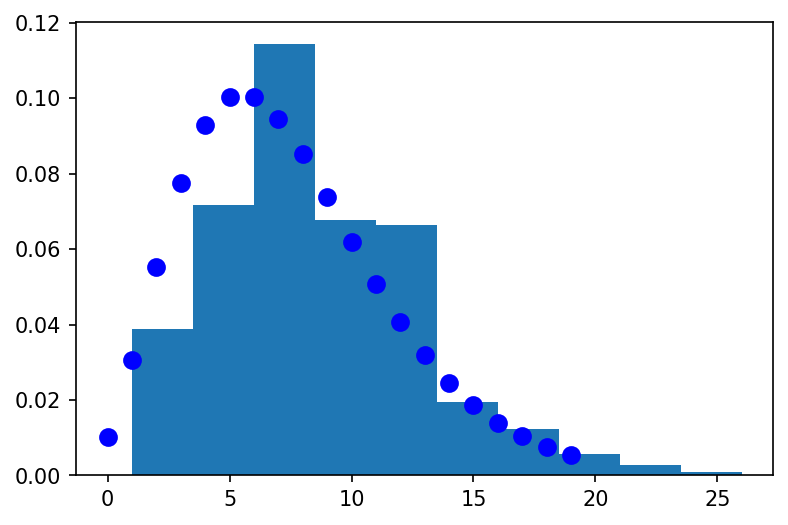

In [10]:
def draw_nbinom_inv(n, k, p):
    '''Uses inversion sampling to draw from negative binomial
    '''
    #define our discrete set.
    A = np.arange(0, 100).astype(int)
    #get our uniform draw
    U = np.random.uniform(low=0, high=1, size=n)
    #initialize draw
    draw = np.zeros_like(U)
    #acutlaly draw
    for i, u in enumerate(U):
        draw[i] = G(u, A, nbinom, k, p, True)

    return draw

#plot the histogram and p.m.f.
neg_binom = draw_nbinom_inv(1000, 5, 0.4)
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.hist(neg_binom, density=True)
x = np.arange(nbinom.ppf(0.01, 5, 0.4), nbinom.ppf(0.99, 5, 0.4))
ax.plot(x, nbinom.pmf(x, 5, 0.4), 'bo', ms=8)
plt.show()

# Exercise 10.4

Notice that $f_Q \geq f_P$ for all $x\in [0, 1]$ where $Q\sim\operatorname{Beta}(2, 2)$ is our proposal distribution and $P\propto x(1 - x)e^{-x}$ is our target distribution. 
Therefore we can use inversion sampling buy drawing $z$ from $Q$ and accepting the draw if the corresponding draw from $\operatorname{Uniform}([0, 1])$ is such that $u \leq \frac{f_P(z)}{f_Q(z)}$.
Note that th eintegral of the p.d.f. of $P$ is less than 1, so when we call $density=True$ in the histogram call, the histogram
will always be above the graph of the p.d.f. of $P$.

We now code This up as follows

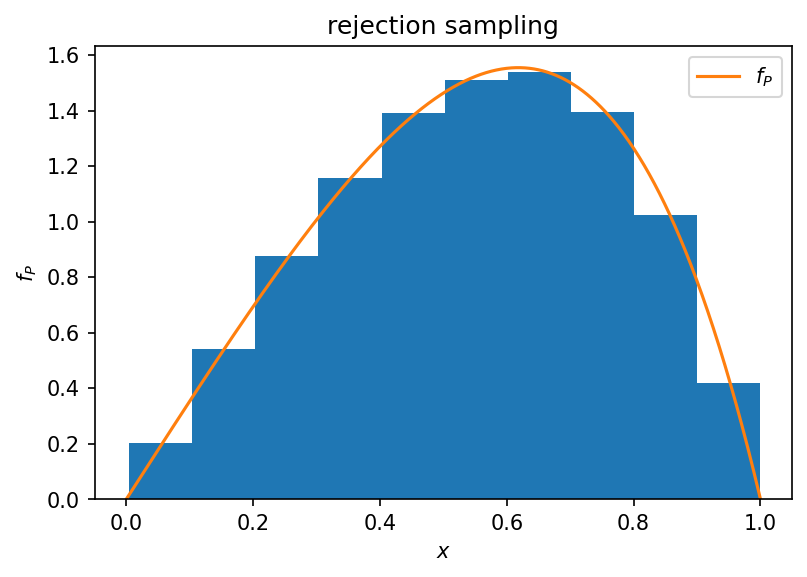

In [3]:
def reject(a, b, n= int(1e5)):
    '''Uses rejection sampling to draw from a distribution P α x(1-x)e^(-x)
    '''
    #distribution we want to sample
    P = lambda x: x*(1-x)*np.exp(x)
    #domain for plotting the p.d.f.
    domain = np.linspace(0,1, 1000)
    
    Z, _ = quad(P, 0, 1)
    
    P_pdf = lambda x: P(x) / Z

    #draw from beta distribution
    z = np.random.beta(a, b, size=n)
    #draw from uniform distribution
    u = np.random.uniform(low=0, high=0.5, size=n)
    #get our acceptance using masking
    arr_check = P(z) / beta.pdf(z, a, b)
    mask = u <= arr_check
    accept = z[mask]

    #plot histogram and p.d.f.
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.hist(accept, density=True)
    ax.plot(domain, P_pdf(domain), label=r'$f_{P}$')
    ax.legend(loc='best')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f_{P}$')
    ax.set_title('rejection sampling')
    plt.show()
reject(2, 2)